In [23]:
print("TraceX")

TraceX


In [24]:
pip install opencv-python matplotlib ipython

Note: you may need to restart the kernel to use updated packages.


Could not find platform independent libraries <prefix>


In [25]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Video


In [26]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [27]:
model = cv2.dnn_DetectionModel(frozen_model, config_file)
Class_Labels = []
file_name = 'labels.names'
with open(file_name, 'rt') as fpt:
  Class_Labels = fpt.read().rstrip('\n').split('\n')
  

In [28]:
print(Class_Labels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [29]:
model.setInputSize(320, 320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5, 127.5, 127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 000001F70989A2F0>

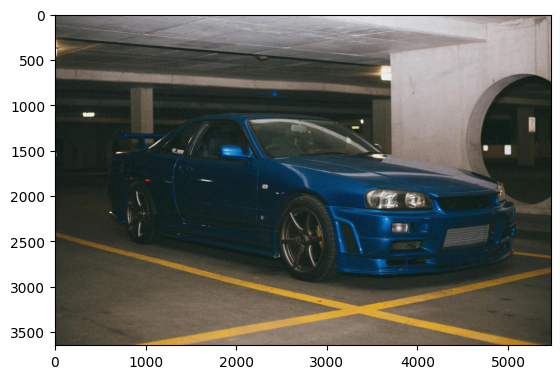

In [30]:
img = cv2.imread('gtr.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [31]:
ClassIndex, confidence, bbox = model.detect(img, confThreshold=0.5)
print(ClassIndex)

[3 2]


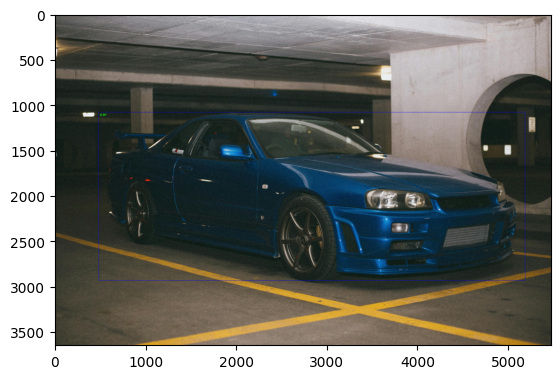

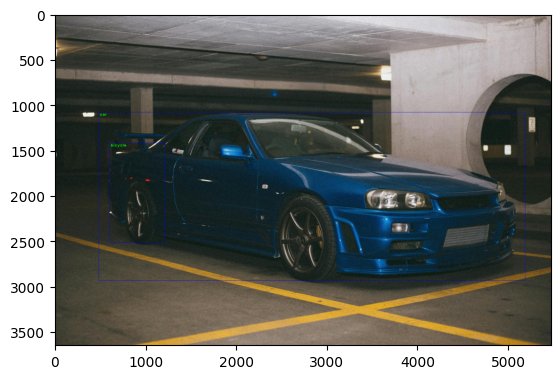

In [32]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
  cv2.rectangle(img, boxes, (255, 0, 0), 2)
  cv2.putText(img, Class_Labels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale=font_scale, color=(0, 255, 0), thickness=3)
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.show()

In [33]:


cap = cv2.VideoCapture('demo.mp4')
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open video")

# Get frame size for VideoWriter
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS) or 20.0  # fallback if FPS is 0

# Define the codec and create VideoWriter object
out = cv2.VideoWriter('output.mp4', cv2.VideoWriter_fourcc(*'mp4v'), fps, (frame_width, frame_height))

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()
    if not ret or frame is None:
        break   # stop if no frame

    # Run object detection only if frame is valid
    ClassIndex, confidence, bbox = model.detect(frame, confThreshold=0.55)

    if len(ClassIndex) != 0:
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if ClassInd <= 80:
                x, y, w, h = boxes
                cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
                cv2.putText(frame,
                            Class_Labels[ClassInd-1],
                            (x + 10, y + 40),
                            font,
                            fontScale=font_scale,
                            color=(0, 255, 0),
                            thickness=3)

    out.write(frame)  # save annotated frame
    cv2.imshow('Object Detection', frame)
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
out.release()
cv2.destroyAllWindows()